MODULE IMPORTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns

DATA PROFILING

In [2]:


df=pd.read_csv("earth.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [3]:
df["injuries_description"]=df["injuries_description"].astype(dtype="object")

In [4]:
df["injuries_description"].dtype

dtype('O')

In [5]:
df["region_code"]=df["region_code"].astype(dtype="object")
df["damage_description"]=df["damage_description"].astype(dtype="object")
df["total_injuries_description"]=df["total_injuries_description"].astype(dtype="object")
df["total_damage_description"]=df["damage_description"].astype(dtype="object")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [7]:
df.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338.0,No,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771.0,Tsu,1580.0,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2,NaN,NaN,NaN,2
2,7889.0,Tsu,1757.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697.0,Tsu,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013.0,Tsu,1668.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
6067,5360.0,Tsu,1993.0,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1,250.0,4,48.0,1,250.0,4
6068,5009.0,No,1983.0,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4,NaN,NaN,25.0,4
6069,10307.0,No,2018.0,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3,61.0,4,300.0,3,61.0,4
6070,5498.0,No,1998.0,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2,72.0,4,100.0,2,72.0,4
6071,5459.0,No,1997.0,4.0,22.0,9.0,31.0,23.2,5.0,6.7,...,-60.892,90,2.0,1,25.0,4,2.0,1,25.0,4


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


In [10]:
mask=df.isna()
mask


,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,False,False,False,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,True,True,False,False,...,False,False,True,True,True,False,True,True,True,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6068,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,True,False,False
6069,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6070,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


DEALING WITH MISSING DATA

In [11]:
total=mask.sum()
percentage=100*mask.mean()
percentage

id                                0.000000
flag_tsunami                      0.000000
year                              0.000000
month                             6.669960
day                               9.173254
hour                             33.399209
minute                           36.791831
second                           55.187747
focal_depth                      48.616601
eq_primary                       29.413702
eq_mag_mw                        79.973650
eq_mag_ms                        51.976285
eq_mag_mb                        70.586298
intensity                        54.743083
country                           0.000000
state                            94.927536
location_name                     0.016469
latitude                          0.889328
longitude                         0.823452
region_code                       0.000000
injuries                         80.747694
injuries_description             77.783267
damage_millions_dollars          92.127800
damage_desc

In [12]:
missing_data=pd.concat([total,percentage],axis=1,join="outer",keys=["count_missing","perc-missing"])
missing_data

,count_missing,perc-missing
id,0,0.000000
flag_tsunami,0,0.000000
year,0,0.000000
month,405,6.669960
day,557,9.173254
hour,2028,33.399209
minute,2234,36.791831
second,3351,55.187747
focal_depth,2952,48.616601
eq_primary,1786,29.413702


In [13]:
missing_data.sort_values(by="perc-missing",ascending=False,inplace=True)
missing_data

,count_missing,perc-missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


In [14]:
nullable_columns=df.columns[mask.any()].tolist()
nullable_columns

['month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

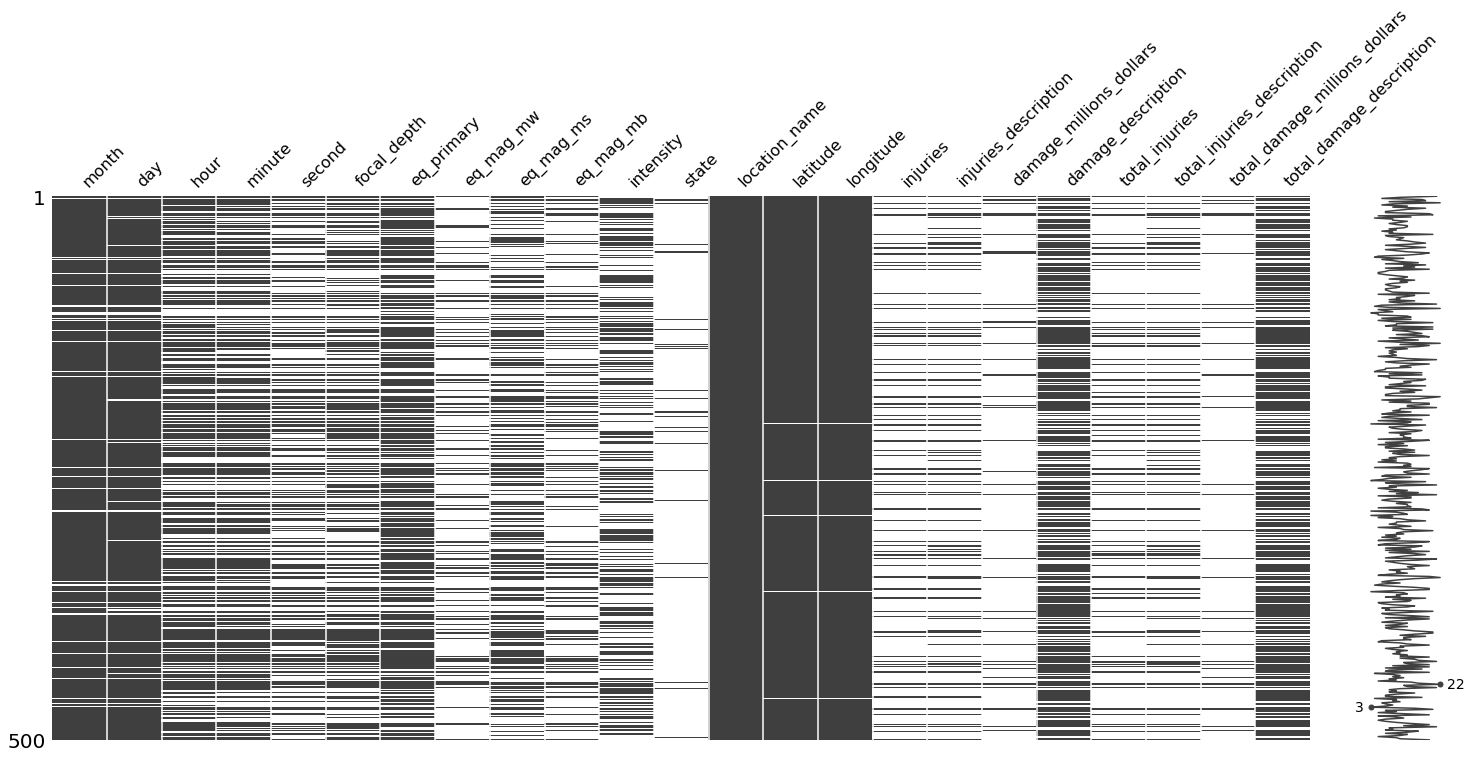

In [15]:
msno.matrix(df[nullable_columns].sample(500))
  

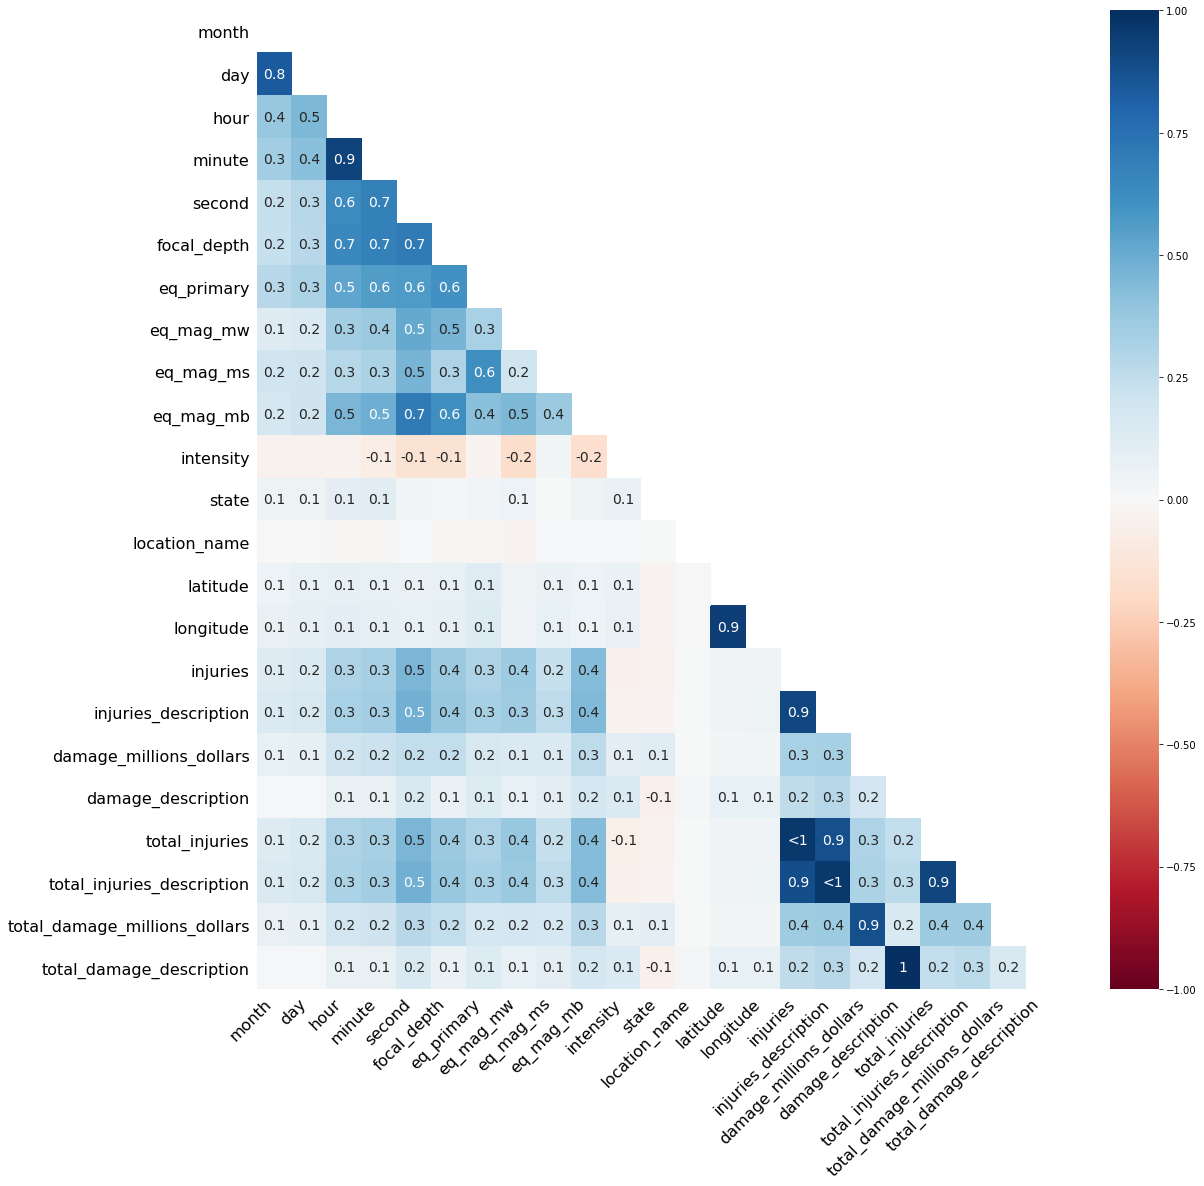

In [16]:
msno.heatmap(df[nullable_columns],figsize=(18,18))



IMPUTATION USING PANDAS

In [17]:
time_features=["month","day","hour","minute","second"]
df[time_features]=df[time_features].fillna(0)

In [18]:
df[time_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6072 non-null   float64
 1   day     6072 non-null   float64
 2   hour    6072 non-null   float64
 3   minute  6072 non-null   float64
 4   second  6072 non-null   float64
dtypes: float64(5)
memory usage: 237.3 KB


IMPUTATION WITH SKLEARN

In [19]:
description_features=["injuries_description","damage_description","total_injuries_description","total_damage_description"]

In [20]:
imp=SimpleImputer(missing_values=np.nan,strategy="constant",fill_value="NA")

In [21]:
df[description_features]=imp.fit_transform(df[description_features])

In [22]:
df[description_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   injuries_description        6072 non-null   object
 1   damage_description          6072 non-null   object
 2   total_injuries_description  6072 non-null   object
 3   total_damage_description    6072 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


IMPUTATION WITH INFERRED VALUES FOR DAMAGE_MILLIONS_DOLLARS COLUMNS

In [23]:
category_name=df[["damage_description","damage_millions_dollars"]].groupby("damage_description").mean()


In [24]:
category_name

,damage_millions_dollars
damage_description,
1.0,0.417211
2.0,3.078840
3.0,13.818806
4.0,3574.998799
NA,NaN


In [25]:
category_name["damage_millions_dollars"]=category_name["damage_millions_dollars"].replace(to_replace=[np.nan],value=[-1])


In [26]:
category_name=category_name.T
category_name

damage_description,1.0,2.0,3.0,4.0,NA
damage_millions_dollars,0.417211,3.07884,13.818806,3574.998799,-1.0


In [27]:
category_name["0"]=0
category_name=category_name.T

In [28]:
category_name

,damage_millions_dollars
damage_description,
1.0,0.417211
2.0,3.078840
3.0,13.818806
4.0,3574.998799
NA,-1.000000
0,0.000000


In [29]:
replacement_value=category_name["damage_millions_dollars"].to_dict()

In [30]:
replacement_value

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385,
 'NA': -1.0,
 '0': 0.0}

In [31]:
df["damage_description"].map(replacement_value)


0         -1.000000
1          3.078840
2         -1.000000
3         -1.000000
4         -1.000000
           ...     
6067    3574.998799
6068    3574.998799
6069    3574.998799
6070    3574.998799
6071    3574.998799
Name: damage_description, Length: 6072, dtype: float64

In [32]:
df["damage_millions_dollars"].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
6067    False
6068    False
6069    False
6070    False
6071    False
Name: damage_millions_dollars, Length: 6072, dtype: bool

In [33]:
df["damage_millions_dollars"]=np.where(df["damage_millions_dollars"].isnull(),df["damage_description"].map(replacement_value),
                                      df["damage_millions_dollars"])

In [34]:
df["damage_millions_dollars"]

0        -1.00000
1         3.07884
2        -1.00000
3        -1.00000
4        -1.00000
          ...    
6067    250.00000
6068     25.00000
6069     61.00000
6070     72.00000
6071     25.00000
Name: damage_millions_dollars, Length: 6072, dtype: float64

ANALYZING THE TARGET COLUMN

In [35]:
flag_tsunami_count=df["flag_tsunami"].value_counts()


In [36]:
flag_tsunami_count

No     4270
Tsu    1802
Name: flag_tsunami, dtype: int64

In [37]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

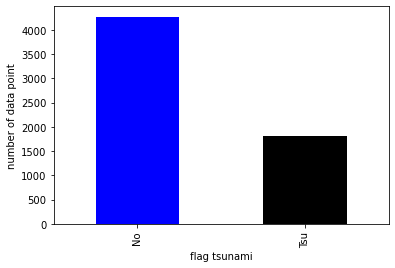

In [38]:
flag_tsunami_count.plot(kind="bar",color=["blue","black"])
plt.ylabel("number of data point")
plt.xlabel("flag tsunami")
plt.show()

THE ABOVE GRAPH SHOWS THERE IS CLASS IMBALANCE IN THE TARGET VARIABLE

ANALYSING THE FEATURE COLUMN

In [39]:
feature_columns=df.drop("flag_tsunami",axis=1)

In [40]:
feature_columns

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338.0,1048.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,120,NaN,NA,-1.00000,NA,NaN,NA,NaN,NA
1,771.0,1580.0,4.0,6.0,0.0,0.0,0.0,33.0,6.2,NaN,...,1.309,120,NaN,NA,3.07884,2,NaN,NA,NaN,2
2,7889.0,1757.0,7.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,...,-6.320,120,NaN,NA,-1.00000,NA,NaN,NA,NaN,NA
3,6697.0,1500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,150,NaN,NA,-1.00000,NA,NaN,NA,NaN,NA
4,6013.0,1668.0,4.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,...,-71.050,150,NaN,NA,-1.00000,NA,NaN,NA,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360.0,1993.0,8.0,8.0,8.0,34.0,24.9,59.0,7.8,7.8,...,144.801,170,48.0,1,250.00000,4,48.0,1,250.0,4
6068,5009.0,1983.0,12.0,22.0,1.0,2.0,2.4,26.0,6.4,NaN,...,151.868,170,NaN,NA,25.00000,4,NaN,NA,25.0,4
6069,10307.0,2018.0,2.0,25.0,17.0,44.0,43.0,23.0,7.5,7.5,...,142.768,170,300.0,3,61.00000,4,300.0,3,61.0,4
6070,5498.0,1998.0,7.0,9.0,5.0,19.0,7.3,10.0,6.2,6.2,...,-28.626,130,100.0,2,72.00000,4,100.0,2,72.0,4


In [41]:
feature_columns_object=feature_columns.select_dtypes(include=np.object)

In [42]:
feature_columns_object

,country,state,location_name,region_code,injuries_description,damage_description,total_injuries_description,total_damage_description
0,UK,NaN,UNITED KINGDOM: BRITIAN,120,NA,NA,NA,NA
1,UK,NaN,UNITED KINGDOM: DOVER STRAITS,120,NA,2,NA,2
2,UK,NaN,"UNITED KINGDOM: ENGLAND: ST. MARY, SCILLY ISL...",120,NA,NA,NA,NA
3,USA,HI,HAWAII,150,NA,NA,NA,NA
4,USA,MA,"BOSTON AND SALEM, MASSACHUSETTS",150,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...
6067,USA TERRITORY,GU,"GUAM: TUMAN BAY, APRA HARBOR",170,1,4,1,4
6068,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: ULAWUN, RABAUL",170,NA,4,NA,4
6069,PAPUA NEW GUINEA,NaN,"PAPUA NEW GUINEA: S HIGHLANDS, HELA; INDONESIA",170,3,4,3,4
6070,AZORES (PORTUGAL),NaN,"AZORES: FAIAL, PICO, TERCEIRA",130,2,4,2,4


In [43]:
feature_columns_numeric=feature_columns.select_dtypes(include=np.number)

In [44]:
feature_columns_numeric

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,latitude,longitude,injuries,damage_millions_dollars,total_injuries,total_damage_millions_dollars
0,338.0,1048.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.000,NaN,NaN,-1.00000,NaN,NaN
1,771.0,1580.0,4.0,6.0,0.0,0.0,0.0,33.0,6.2,NaN,NaN,NaN,NaN,51.019,1.309,NaN,3.07884,NaN,NaN
2,7889.0,1757.0,7.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,49.920,-6.320,NaN,-1.00000,NaN,NaN
3,6697.0,1500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00000,NaN,NaN
4,6013.0,1668.0,4.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,42.350,-71.050,NaN,-1.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360.0,1993.0,8.0,8.0,8.0,34.0,24.9,59.0,7.8,7.8,8.0,7.1,9.0,12.982,144.801,48.0,250.00000,48.0,250.0
6068,5009.0,1983.0,12.0,22.0,1.0,2.0,2.4,26.0,6.4,NaN,6.4,5.7,5.0,-5.392,151.868,NaN,25.00000,NaN,25.0
6069,10307.0,2018.0,2.0,25.0,17.0,44.0,43.0,23.0,7.5,7.5,NaN,NaN,8.0,-6.068,142.768,300.0,61.00000,300.0,61.0
6070,5498.0,1998.0,7.0,9.0,5.0,19.0,7.3,10.0,6.2,6.2,6.0,5.7,NaN,38.650,-28.626,100.0,72.00000,100.0,72.0


ANALYSING THE CATEGORICAL FEATURES

In [45]:
feature_columns_object.nunique().sort_values()

injuries_description             5
damage_description               5
total_injuries_description       5
total_damage_description         5
region_code                     18
state                           29
country                        155
location_name                 3821
dtype: int64

In [46]:
count=df["damage_description"].value_counts()
        
count

NA     1745
2.0    1461
3.0    1309
1.0    1094
4.0     463
Name: damage_description, dtype: int64

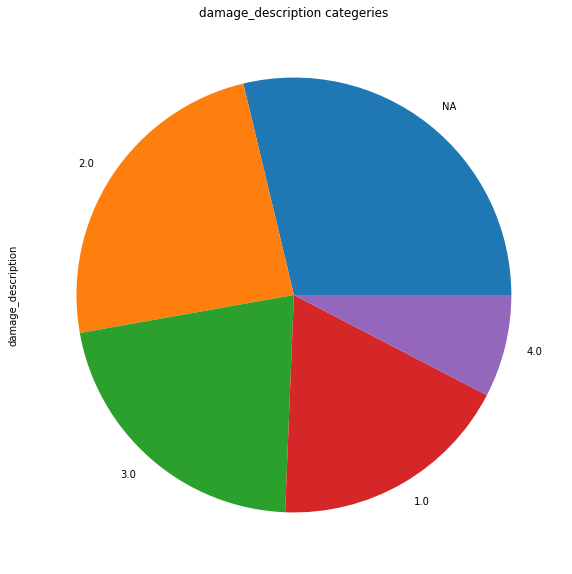

In [47]:
plt.figure(figsize=(10,10))
count.plot(kind="pie")
plt.title("damage_description categeries")
plt.show()

ANALYSING THE CONTINUOUS FEATURES

In [48]:
feature_columns_numeric.kurt()

id                                 -0.866617
year                               19.532730
month                              -1.202962
day                                -1.228782
hour                               -1.132145
minute                             -1.050225
second                             -0.272400
focal_depth                        40.911649
eq_primary                         -0.327067
eq_mag_mw                          -0.593857
eq_mag_ms                          -0.486214
eq_mag_mb                           0.432798
intensity                           0.072622
latitude                            0.384692
longitude                          -0.777352
injuries                          672.946635
damage_millions_dollars          2725.970362
total_injuries                    569.624067
total_damage_millions_dollars     202.895621
dtype: float64

LARGER KURTOSIS VALUES SHOWS THERE IS OUTLIES IN THAT PARTICULAR COLUMN

In [49]:
feature_columns_numeric.skew()

id                                0.300563
year                             -3.859655
month                            -0.012936
day                               0.036121
hour                              0.570365
minute                            0.618738
second                            1.096737
focal_depth                       5.866408
eq_primary                       -0.295823
eq_mag_mw                         0.154842
eq_mag_ms                        -0.243581
eq_mag_mb                        -0.058037
intensity                        -0.442065
latitude                         -1.038393
longitude                        -0.457442
injuries                         24.428284
damage_millions_dollars          47.532464
total_injuries                   22.191856
total_damage_millions_dollars    13.227907
dtype: float64

THE ABOVE INFORMATION IS THE SKEWNESS OF EACH NUMERIC FEATURES COLUMN

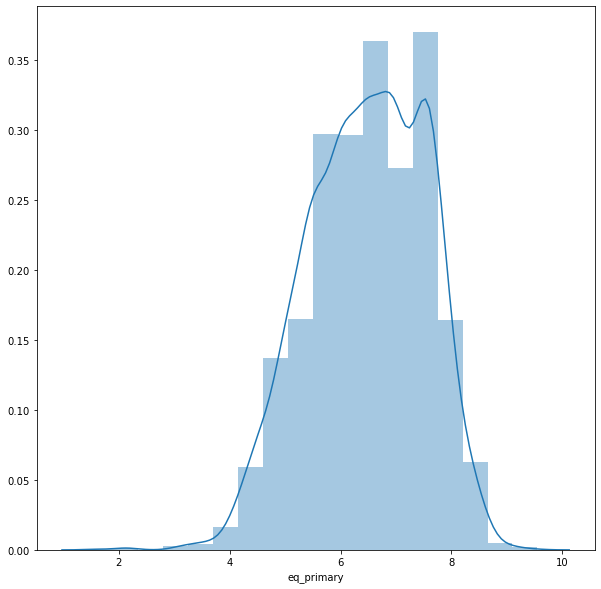

In [50]:
plt.figure(figsize=(10,10))
sns.distplot(feature_columns_numeric["eq_primary"].dropna(),bins=np.linspace(1,10,21))
plt.show()

PLOTING HISTOGRAM FOR EQ_PRIMARY COLUMN,SEEING THIS FROM IT SKEW VALUES SHOWS ITS GOING TO BE SYMMETRIC(VALUE VERY CLOSE TO ZERO)

RELATIONSHIP WITHIN DATA


TAKING TWO COUNTINOUS COLUMNS; PRIMARY EARTHQUAKE AND NUMBER OF INJURIES

In [51]:
data_to_plot=df[~df["injuries"].isna() & ~df["eq_primary"].isna()]

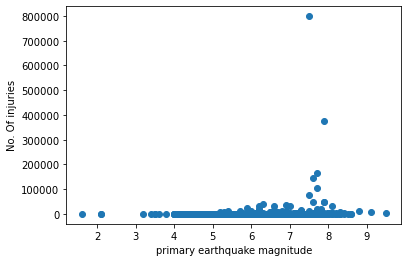

In [52]:
plt.figure()
plt.scatter(y=data_to_plot["injuries"],x=data_to_plot["eq_primary"])
plt.xlabel("primary earthquake magnitude")
plt.ylabel("No. Of injuries")
plt.show()

CORRETION ON ALL THE FEATURES THAT ARE NUMERIC

In [53]:
feature_columns_numeric.corr()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,eq_mag_ms,eq_mag_mb,intensity,latitude,longitude,injuries,damage_millions_dollars,total_injuries,total_damage_millions_dollars
id,1.000000,0.388161,0.115451,0.108821,0.257695,0.298625,0.400048,-0.094010,-0.314889,-0.244084,-0.320861,-0.146084,-0.535073,-0.193233,0.111369,-0.026274,0.011512,-0.017737,0.148667
year,0.388161,1.000000,0.226211,0.255467,0.367456,0.383804,0.338713,-0.021715,-0.107586,-0.179219,-0.095600,-0.337854,-0.231869,-0.202050,-0.007997,0.000364,0.004807,0.004450,0.109914
month,0.115451,0.226211,1.000000,0.193211,0.115535,0.128325,0.104829,-0.001941,0.025681,0.051411,0.027173,-0.004570,-0.042154,-0.076116,0.036397,-0.008942,-0.013613,-0.020702,-0.081710
day,0.108821,0.255467,0.193211,1.000000,0.161032,0.169799,0.098278,0.046122,0.025942,-0.010830,0.031666,0.003612,-0.048175,-0.033789,-0.001586,0.033697,0.008009,0.029172,-0.010303
hour,0.257695,0.367456,0.115535,0.161032,1.000000,0.452240,0.348146,0.018810,-0.013370,0.057972,0.013751,0.014292,-0.129871,-0.101550,-0.019430,0.016069,0.006004,0.026786,-0.040564
minute,0.298625,0.383804,0.128325,0.169799,0.452240,1.000000,0.407914,-0.012093,-0.042408,-0.003184,-0.010272,-0.027243,-0.164850,-0.113266,0.011059,0.014819,0.026594,0.026552,0.064178
second,0.400048,0.338713,0.104829,0.098278,0.348146,0.407914,1.000000,-0.102071,-0.156017,-0.052806,-0.120404,-0.022103,-0.302816,-0.121511,0.071917,0.031817,0.022327,0.022924,-0.008776
focal_depth,-0.094010,-0.021715,-0.001941,0.046122,0.018810,-0.012093,-0.102071,1.000000,0.269882,0.225495,0.234067,0.243379,-0.119577,-0.123945,-0.021935,-0.014242,-0.020257,-0.016711,-0.032135
eq_primary,-0.314889,-0.107586,0.025681,0.025942,-0.013370,-0.042408,-0.156017,0.269882,1.000000,1.000000,0.985572,0.899832,0.408198,-0.234861,0.000322,0.106175,0.073113,0.104226,0.158815
eq_mag_mw,-0.244084,-0.179219,0.051411,-0.010830,0.057972,-0.003184,-0.052806,0.225495,1.000000,1.000000,0.958735,0.881920,0.477595,-0.247265,0.055516,0.128447,0.110443,0.124740,0.178322


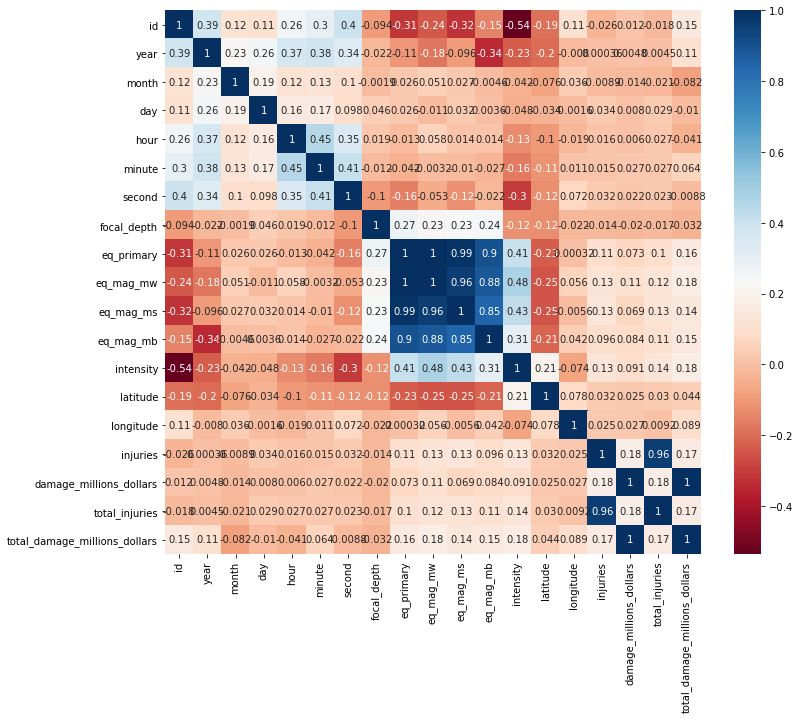

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(feature_columns_numeric.corr(),annot=True,cmap="RdBu")
plt.show()

RELATIONSHIP BETWEEN CATEGOTICAL AND NUMERIC VARIABLE; FLAG_tsunami and intensity

In [55]:
df["flag_tsunami"]=df["flag_tsunami"].replace(to_replace=["No","Tsu"],value=[0,1])

In [56]:
subset=df.loc[~df["intensity"].isna(),["intensity","flag_tsunami"]]

In [57]:
data_to_plot=subset.groupby("intensity").sum()
data_to_plot

,flag_tsunami
intensity,
2.0,0
3.0,8
4.0,19
5.0,38
6.0,63
7.0,91
8.0,119
9.0,132
10.0,130


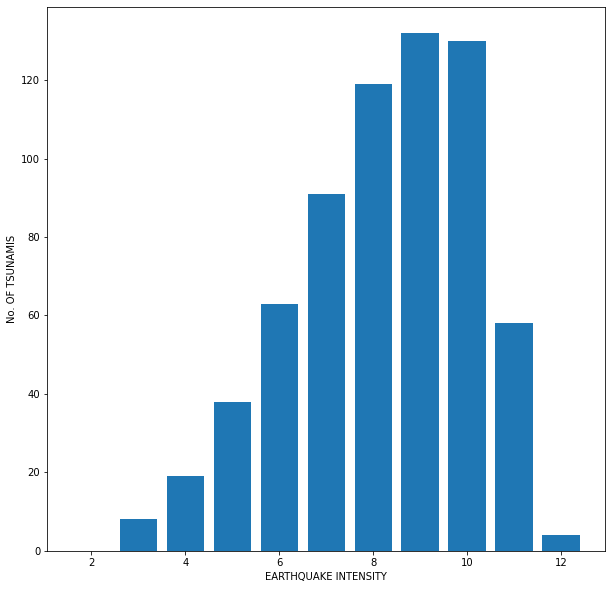

In [58]:
plt.figure(figsize=(10,10))
plt.bar(x=data_to_plot.index,height=data_to_plot["flag_tsunami"])
plt.xlabel("EARTHQUAKE INTENSITY")
plt.ylabel("No. OF TSUNAMIS")
plt.show()

USING BOX PLOT ; EQ PRIMARY AND EARTHQUAKE COUNTRIES

In [66]:
country_counts=df["country"].value_counts()

In [74]:
country_counts

,index,country
0,CHINA,590
1,JAPAN,403
2,INDONESIA,379
3,IRAN,377
4,ITALY,325
...,...,...
150,IRELAND,1
151,DJIBOUTI,1
152,WALLIS AND FUTUNA (FRENCH TERRITORY),1
153,MONTSERRAT,1


In [81]:
top_countries=country_counts[country_counts>100]

In [82]:
top_countries

CHINA          590
JAPAN          403
INDONESIA      379
IRAN           377
ITALY          325
TURKEY         321
USA            260
GREECE         260
PHILIPPINES    210
MEXICO         198
CHILE          193
PERU           180
RUSSIA         149
Name: country, dtype: int64

In [85]:
subset=df[df["country"].isin(top_countries.index)]

In [86]:
subset

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
3,6697.0,1,1500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,150,NaN,NA,-1.000000,NA,NaN,NA,NaN,NA
4,6013.0,1,1668.0,4.0,13.0,0.0,0.0,0.0,NaN,NaN,...,-71.050,150,NaN,NA,-1.000000,NA,NaN,NA,NaN,NA
5,5828.0,1,1755.0,11.0,18.0,9.0,11.0,35.0,NaN,7.0,...,-70.300,150,NaN,NA,3.078840,2,NaN,NA,NaN,2
6,5927.0,1,1788.0,8.0,6.0,0.0,0.0,0.0,NaN,8.0,...,-161.000,150,NaN,NA,-1.000000,NA,NaN,NA,NaN,NA
7,7058.0,1,1811.0,12.0,16.0,13.0,15.0,0.0,NaN,7.0,...,-90.400,150,NaN,NA,-1.000000,NA,NaN,NA,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,1328.0,0,1754.0,5.0,15.0,21.0,0.0,0.0,NaN,NaN,...,120.993,170,NaN,NA,3574.998799,4,NaN,NA,NaN,4
6060,2073.0,1,1863.0,6.0,3.0,11.0,20.0,0.0,NaN,6.5,...,121.000,170,2000.0,4,3574.998799,4,2000.0,4,NaN,4
6061,4739.0,1,1976.0,8.0,16.0,16.0,11.0,7.3,33.0,8.0,...,124.090,170,3500.0,4,134.000000,4,10000.0,4,134.0,4
6062,5253.0,0,1990.0,7.0,16.0,7.0,26.0,34.6,25.0,7.8,...,121.172,170,3000.0,4,369.600000,4,3000.0,4,369.6,4


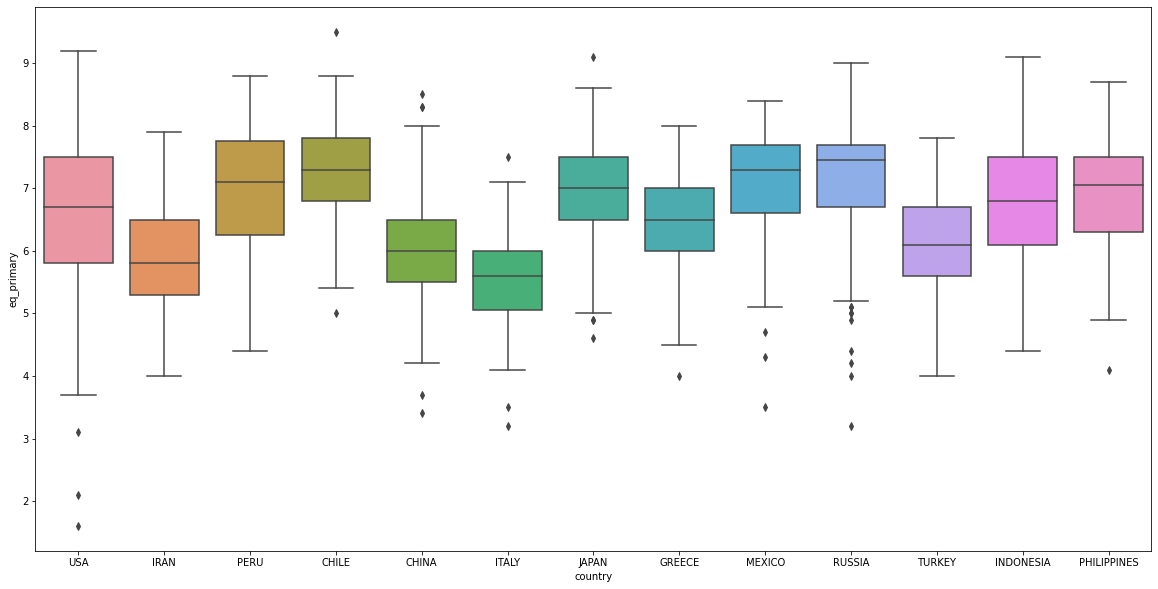

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x="country",y="eq_primary",data=subset)
plt.show()